<pre>
Name: Ritika Sarkar 
Reg. No.: 19BAI1031 
Faculty: Dr. G. Suganya 
Slot: L3 + L4 
Course Code: CSE1015 
Date: 03.04.2021
</pre>

Link to dataset: https://www.kaggle.com/itsmesunil/bank-loan-modelling

<h2>Multi Layer Perceptron</h2>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", engine="openpyxl", sheet_name="Data") 
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Target : Personal Loan

In [4]:
# dataset used in Single Layer Perceptron and Naive Bayes implementation before and recently KNN

In [5]:
df.shape

(5000, 14)

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.isnull().sum() #checking missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

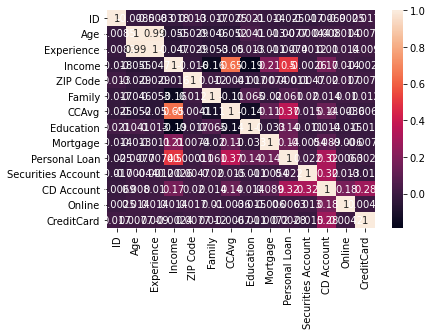

In [8]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [9]:
df.drop(['ID','ZIP Code','Age'],axis=1, inplace=True)

Splitting the dataset

In [10]:
x = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train.shape

(3500, 10)

In [11]:
x_test.shape, y_test.shape

((1500, 10), (1500,))

Model Training

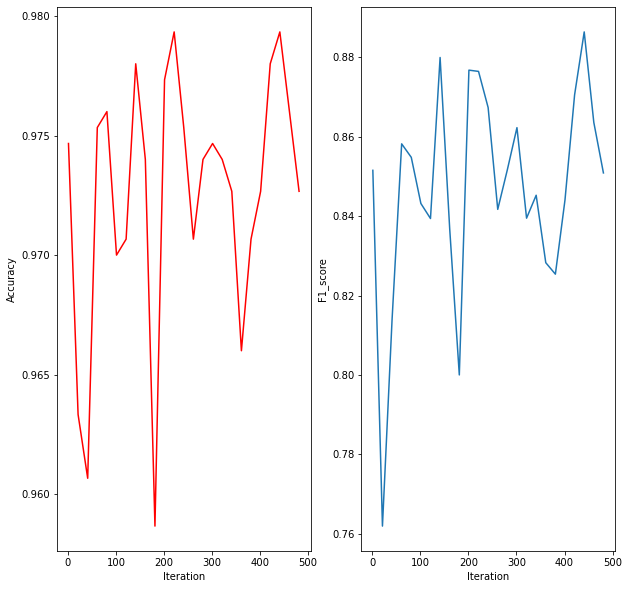

In [13]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

acc = []
cr = []
it = []
for i in range(1,500,20):
    mlp = MLPClassifier(max_iter=500, activation='relu') #max 500 epochs
    #activation function by default its relu
    mlp.fit(x_train, y_train)
    pred = mlp.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    cr.append(f1_score(y_test,pred))
    it.append(i)
    
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(it,acc,color='r')
plt.subplot(1,2,2)

plt.plot(it,cr)
plt.xlabel("Iteration")
plt.ylabel("F1_score")

plt.show()

Predict

Evaluation metrics

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix")
print(confusion_matrix(y_test, pred))

Confusion matrix
[[1334   16]
 [  39  111]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1350
           1       0.87      0.74      0.80       150

    accuracy                           0.96      1500
   macro avg       0.92      0.86      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [24]:
print("Accuracy: ",accuracy_score(y_test, pred))

Accuracy:  0.9633333333333334


### The accuracy is better than all - (Single Layer perceptron = 87.5%, Naive Baiyes = 94%, KNN = 90.53%)

In [ ]:
# its possibly because of the number of iterations of training and the hidden layer and backpropagation